In [23]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import csv
import time
import seaborn as sns

# Sentiment Analysis
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "ae7R1aGdXEsC33OGlGF22f3Zs"
consumer_secret = "jxHdLEeGVGGjY08hoDcSF5P70sKmnO09Lh537wsa6jOrmKA0Lv"
access_token = "413505097-lGcpBoa1LnkdmtcNqmfPeWHBWwgnLIyu5sSLgRdW"
access_token_secret = "Dt9Sx3mKeacKoSbs3TsenClNRf4aGahXiqum5w3dOP2Vl"

In [32]:
# Authentication of Tweepy API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# News Media Twitter Accounts
news_source = ["BBCWorld", "CNN", "nytimes", "FoxNews", "CBSNews"]

In [33]:
# Dictionary for Tweet Data
tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

for x in range(5):

    # Loop news sources
    for source in news_source:

        tweets = api.user_timeline(source, page=x)

        for tweet in tweets:

            # JSON Data Grab from Twitter
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])

            # Vader Sentiment Analysis
            tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])
            
# Store the final contents into a DataFrame
tweet_df = pd.DataFrame(tweet_data, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])

# Export to CSV
file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
tweet_df.to_csv("Homework_Assignments/Homework7_Social_Analytics/" + file_name, encoding="utf-8")

# Visualize the DataFrame
tweet_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Homework_Assignments/Homework7_Social_Analytics/04-19-18-tweets.csv'

In [34]:
# Count the total number of tweets
tweet_df.count()

tweet_source         500
tweet_text           500
tweet_date           500
tweet_vader_score    500
tweet_pos_score      500
tweet_neu_score      500
tweet_neg_score      500
dtype: int64

In [35]:
# Source Names
tweet_df["tweet_source"].unique()

array(['BBC News (World)', 'CNN', 'The New York Times', 'Fox News',
       'CBS News'], dtype=object)

In [28]:
# Convert dates into datetimes
tweet_df["tweet_date"] = pd.to_datetime(tweet_df["tweet_date"])

# Sort the dataframe by date
tweet_df.sort_values("tweet_date", inplace=True)
tweet_df.reset_index(drop=True, inplace=True)

tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,BBC News (World),Southwest crash: Passengers praise pilot for s...,2018-04-18 15:28:22,0.5859,0.428,0.395,0.178
1,BBC News (World),London mayor: Justin Trudeau and Jacinda Arder...,2018-04-18 15:36:42,0.0000,0.000,1.000,0.000
2,BBC News (World),Belgium firms prosecuted over exporting Sarin ...,2018-04-18 15:47:19,-0.3818,0.000,0.776,0.224
3,BBC News (World),Autistic teen's Lego Titanic replica on displa...,2018-04-18 16:27:09,0.0000,0.000,1.000,0.000
4,BBC News (World),Cuba nominates Castro replacement https://t.co...,2018-04-18 16:27:09,0.0000,0.000,1.000,0.000


FileNotFoundError: [Errno 2] No such file or directory: 'Homework_Assignments/Homework7_Social_Analytics/04-19-18-Fig1.png'

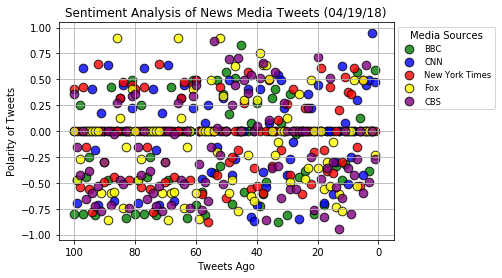

In [36]:
# Scatter Plot
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=75,
            alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CNN"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="blue", s=75,
            alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "The New York Times"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75,
            alpha=0.8, label="New York Times")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "Fox News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="yellow", s=75,
            alpha=0.8, label="Fox")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CBS News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="purple", s=75,
            alpha=0.8, label="CBS")


# Incorporate the other graph properties
plt.title("Sentiment Analysis of News Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Polarity of Tweets")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

# Create a Legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)

# Save Figure
file_name = str(time.strftime("%m-%d-%y")) + "-Fig1.png"
plt.savefig("Homework_Assignments/Homework7_Social_Analytics/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show Plot
plt.show()

In [37]:
# Average polarity by News Source
tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

# View Polarities
pd.DataFrame(tweet_df_polarity)

,tweet_vader_score
tweet_source,
BBC News (World),-0.132527
CBS News,-0.177613
CNN,-0.001964
Fox News,-0.102378
The New York Times,-0.041554


FileNotFoundError: [Errno 2] No such file or directory: 'Homework_Assignments/Homework7_Social_Analytics/04-19-18-Fig2.png'

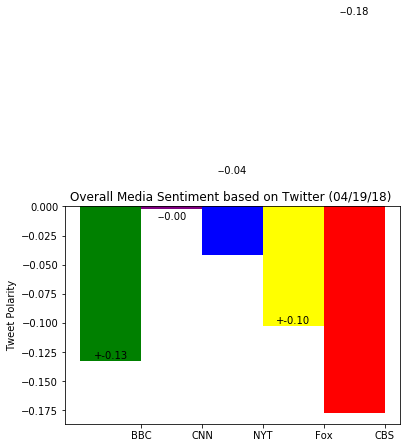

In [38]:
# Polarity Tuple Storage
tweets_polarity = (tweet_df_polarity["BBC News (World)"], 
                    tweet_df_polarity["CNN"], 
                    tweet_df_polarity["The New York Times"], 
                    tweet_df_polarity["Fox News"],
                    tweet_df_polarity["CBS News"])

# Generate bars for each news source
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))  
width = 1
rect1 = ax.bar(ind[0], tweets_polarity[0], width, color="green")
rect2 = ax.bar(ind[1], tweets_polarity[1], width, color="purple")
rect3 = ax.bar(ind[2], tweets_polarity[2], width, color="blue")
rect4 = ax.bar(ind[3], tweets_polarity[3], width, color='yellow')
rect5 = ax.bar(ind[4], tweets_polarity[4], width, color='red')

# Generate labels for each news source
def autolabelpos(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '+%.2f' % float(height),
                ha='center', va='bottom')

def autolabelneg(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.015,
                '-%.2f' % float(height),
                ha='center', va='bottom')

autolabelpos(rect1)
autolabelneg(rect2)
autolabelneg(rect3)
autolabelpos(rect4)
autolabelneg(rect5)

ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter (%s) " % (time.strftime("%x")))
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("BBC", "CNN", "NYT", "Fox", "CBS"))
ax.set_autoscaley_on(True)
ax.grid(False)

# Save Figure
file_name = str(time.strftime("%m-%d-%y")) + "-Fig2.png"
plt.savefig("Homework_Assignments/Homework7_Social_Analytics/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show Figure
fig.show()